In [1]:
from multi_nutrient_model import ref_parameters, perturbation_dynamics, \
    perturbation_steady_state, I0,  PARAMETER_NAMES, PARAMETER_DESCRIPTIONS, steady_state
import numpy as np


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


# Set font size and style in matplotlib
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# Error bar kwargs for prism style plots
errorbar_kwargs = {'capsize': 2, 'capthick': 1, 'elinewidth': 1, 'zorder': 10}

# Spine properties
spine_properties = {'color': 'black', 'linewidth': 2}

# TODO Better colors for this figure

# Color palate with basal, default, and perturbation colors
colors_basal = ['whitesmoke','lightsteelblue', 'steelblue']

# Color palate for the K/P models
colors_AIRKO = ['grey', 'lightcoral']
colors_MIRKO = ['grey', 'steelblue']


In [3]:
# Scaling 

# ATP per O2 (3 per O)
PO2 = 5.0
# Whole body oxygen consumption rate ~ 2000 nmol/min/gBW
vO2 = 2000 * 0.7 
# ATP production rate
vATP = PO2 * vO2 
# Scale the oxygen fluxes by vE
vE = vATP 


In [4]:
K_i_ketogenesis = 0.2 # Assumption 
p_fited = ref_parameters( K_i_ketogenesis = K_i_ketogenesis )

In [6]:
VARIABLE_NAME = ['L', 'G', 'F', 'K', 'I', 'IA']
# Make line plots for modifying pertubing individual parameters vE, I_max and VR
time = np.linspace(0, 30, 100)

pertubation_Imax_1 = perturbation_dynamics(time,1.0, p=p_fited,  )[0]

# Version just remove insulin
time = np.linspace(30, 150, 100)
Imax0 = p_fited[PARAMETER_NAMES.index("I_max")]
pertubation_Imax_2 = perturbation_dynamics(time,1.0, p=p_fited, I_max= 0 * Imax0 )[0]

pertubation_Imax =  pd.concat([pertubation_Imax_1, pertubation_Imax_2], axis=0)


# Scale concentration by mouse reference
pertubation_Imax['G'] = pertubation_Imax['G'] * 7 # 7 mM reference glucose
pertubation_Imax['F'] = pertubation_Imax['F'] * 0.5
pertubation_Imax['K'] = pertubation_Imax['K'] * 0.5
pertubation_Imax['L'] = pertubation_Imax['L'] * 0.7

pertubation_Imax = pertubation_Imax.melt(id_vars=['time'], var_name='variable', value_name='value')


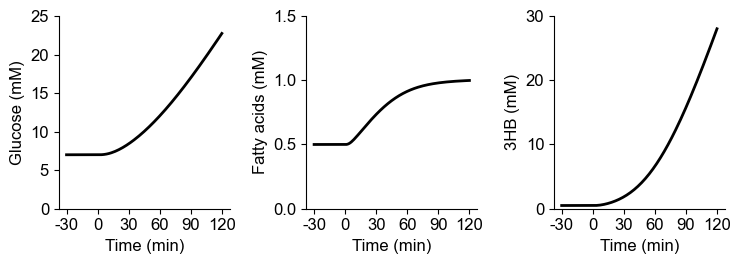

In [7]:
# Type I diabetes 
g = sns.FacetGrid(pertubation_Imax, col="variable", col_wrap=3, height=2.8, aspect=0.9,
                  col_order=['G', 'F', 'K'], sharey=False, sharex=False, )
g.map_dataframe(sns.lineplot, x="time", y="value", linewidth=2, zorder=1, color='black', )

# Edit ylims 
g.axes[0].set_ylim(0, 25)
g.axes[1].set_ylim(0, 1.5)
g.axes[2].set_ylim(0, 30.0)

# Edit x ticks
for a in g.axes:
    a.set_xticks([0,30,60,90,120,150], [-30,0,30,60,90,120])

# Change y and x labels
g.axes[0].set_ylabel("Glucose (mM)")
g.axes[1].set_ylabel("Fatty acids (mM)")
g.axes[2].set_ylabel("3HB (mM)")
g.axes[0].set_xlabel("Time (min)")
g.axes[1].set_xlabel("Time (min)")
g.axes[2].set_xlabel("Time (min)")

g.set_titles("", )
plt.tight_layout()

sns.despine()
plt.savefig("output/valdiation_type_1_diabetes_insulin_drop_out_v2.svg", bbox_inches='tight')